In [1]:
import numpy as np
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("D:\DSA\Data files\Sales_add.csv")

In [5]:
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [6]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [9]:
#H0- The company won't have increase in sales after stepping into digial marketing.
#HA- The company would have increase in sales after stepping into digital marketing.

In [10]:
from statsmodels.stats.weightstats import ztest

In [11]:
z_stat,p_val=ztest(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'],value=14000)

In [12]:
p_val

2.731442140342442e-52

In [13]:
if p_val<0.05:
    print('Null Hypothesis Rejected')
else:
    print('Null Hypothesis Accepted')

Null Hypothesis Rejected


In [14]:
#Hence HA Accepted.

In [15]:
from scipy.stats import chi2_contingency

In [16]:
contingency=pd.crosstab(data['Region'],data['Sales_before_digital_add(in $)'])

In [17]:
contingency

Sales_before_digital_add(in $),130263,130625,131140,132135,132921,137163,140862,141956,145062,146278,...,149559,151514,152167,152493,159339,159525,167996,171259,177195,178939
Region,,,,,,,,,,,,,,,,,,,,,
Region - A,1,0,1,0,1,1,1,0,0,0,...,1,1,0,1,0,0,0,0,1,1
Region - B,0,0,0,1,0,0,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
Region - C,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0


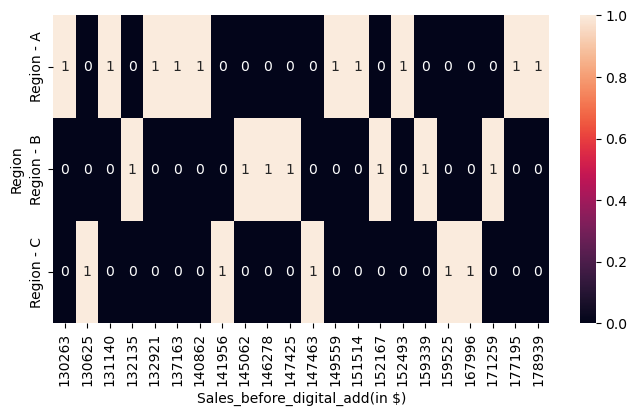

In [18]:
plt.figure(figsize=(8,4))
sns.heatmap(contingency,annot=True)
plt.show()

In [19]:
contingency1=pd.crosstab(data['Region'],data['Sales_After_digital_add(in $)'])

In [20]:
contingency1

Sales_After_digital_add(in $),187305,191517,193735,203175,205180,212579,222106,223334,226261,227040,...,231808,234908,243020,244243,253131,256948,258402,263388,270390,276279
Region,,,,,,,,,,,,,,,,,,,,,
Region - A,1,0,0,0,0,1,0,1,0,0,...,0,1,1,0,1,1,0,0,1,1
Region - B,0,0,0,1,1,0,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
Region - C,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
chi2_stat,p_val1,dof,exp=chi2_contingency(contingency)
p_val

2.731442140342442e-52

In [22]:
if p_val1<0.05:
    print('Null Hypothesis Rejected')
else:
    print('Null Hypothesis Accepted')

Null Hypothesis Accepted


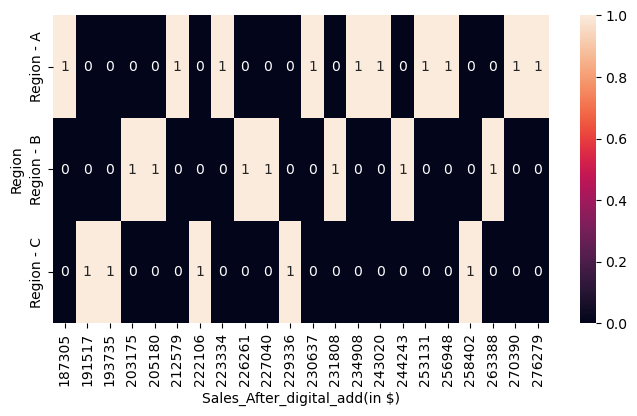

In [23]:
plt.figure(figsize=(8,4))
sns.heatmap(contingency1,annot=True)
plt.show()

In [24]:
chi2_stat,p_val2,dof,exp=chi2_contingency(contingency1)
p_val2

0.3869087441885616

In [25]:
if p_val2<0.05:
    print('Null Hypothesis Rejected')
else:
    print('Null Hypothesis Accepted')

Null Hypothesis Accepted
